In [ ]:
import pandas as pd

df = pd.read_excel('datauji.xlsx')
df

,Soal1,Soal2,Soal3,Soal4,Soal5,Soal6,Soal7,Soal8,Soal9,Soal10,...,Soal28,Soal29,Soal30,Soal31,Soal32,Soal33,Soal34,Soal35,Soal36,Hasil
0,2,2,2,2,3,2,3,3,3,3,...,3,3,2,2,1,3,3,3,2,Auditori
1,2,2,1,1,2,1,2,3,1,2,...,3,2,1,3,1,3,1,2,3,Kinestetik
2,2,3,2,2,2,1,2,3,1,2,...,3,3,1,2,1,3,3,2,3,Kinestetik
3,2,3,2,2,2,2,3,3,1,1,...,2,3,2,1,2,2,2,2,1,Visual
4,3,2,3,2,3,1,2,3,1,1,...,3,2,1,1,3,1,1,3,3,Auditori
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,3,2,2,3,3,2,3,1,3,2,...,1,2,3,2,2,2,3,1,1,Auditori
1755,2,2,3,2,2,2,3,2,3,3,...,2,3,1,2,1,2,3,3,2,Auditori
1756,2,1,3,2,2,3,2,1,3,1,...,1,2,1,1,1,1,2,2,3,Auditori
1757,2,1,2,1,2,1,2,2,2,1,...,2,3,3,3,2,3,2,2,2,Kinestetik


In [ ]:
x = df.drop('Hasil', axis=1)
y = df['Hasil']

In [ ]:
len(x.index)


1759

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()


label = le.fit_transform(y)

# printing label
label


array([0, 1, 1, ..., 0, 1, 2])

In [ ]:
len(label)


1759

In [ ]:

# df.drop("Purchased", axis=1, inplace=True)


y = label

# printing Dataframe
y


array([0, 1, 1, ..., 0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3) #3,
modell = KNeighborsClassifier()
parameter = {'n_neighbors' : np.arange(1,28), 'weights' : ['distance', 'uniform'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
gg = GridSearchCV(modell, param_grid=parameter)#2,8
gg.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
                         'weights': ['distance', 'uniform']})

In [ ]:
gg.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 14, 'weights': 'distance'}

In [ ]:
gg.best_score_

0.7937579214195183

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15) #3,
modell = KNeighborsClassifier()
parameter = {'n_neighbors' : np.arange(1,30), 'weights' : ['distance', 'uniform']}
gg = GridSearchCV(modell, param_grid=parameter)#2,8
gg.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['distance', 'uniform']})

In [ ]:
gg.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [ ]:
gg.best_score_

0.8061904761904761

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)
model = KNeighborsClassifier(n_neighbors = 11, weights ='distance', algorithm ='ball_tree')
model.fit(x_train,y_train)
h_cv = cross_val_score(model, x_test, y_test)
print(h_cv.mean())
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred,labels = [0,1,2]))
print(classification_report(y_test,y_pred))

0.7142857142857143
[[ 9  3  0]
 [ 0 13  0]
 [ 1  0  9]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.81      1.00      0.90        13
           2       1.00      0.90      0.95        10

    accuracy                           0.89        35
   macro avg       0.90      0.88      0.89        35
weighted avg       0.90      0.89      0.88        35



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)
model = KNeighborsClassifier(n_neighbors = 9, weights ='distance')
model.fit(x_train,y_train)
h_cv = cross_val_score(model, x_test, y_test)
print(h_cv.mean())
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred,labels = [0,1,2]))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

0.5714285714285714
[[10  2  0]
 [ 0 13  0]
 [ 1  0  9]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        10

    accuracy                           0.91        35
   macro avg       0.93      0.91      0.92        35
weighted avg       0.92      0.91      0.91        35

0.9142857142857143


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)
model = KNeighborsClassifier(n_neighbors = 12, weights ='distance')
model.fit(x_train,y_train)
h_cv = cross_val_score(model, x_test, y_test)
print(h_cv.mean())
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred,labels = ['Auditori','Kinestetik','Visual']))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

0.7142857142857142
[[ 9  3  0]
 [ 1 12  0]
 [ 2  0  8]]
              precision    recall  f1-score   support

    Auditori       0.75      0.75      0.75        12
  Kinestetik       0.80      0.92      0.86        13
      Visual       1.00      0.80      0.89        10

    accuracy                           0.83        35
   macro avg       0.85      0.82      0.83        35
weighted avg       0.84      0.83      0.83        35

0.8285714285714286


Kodingan cari banyak hasil

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cv_score_dist = np.zeros(shape=(1, 13))
acc_score_dist = np.zeros(shape=(1, 13))
start=27
end=start+13
for j in range(start, end):
  print(j)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)
  model = KNeighborsClassifier(n_neighbors = j, weights ='distance')
  model.fit(x_train,y_train)
  h_cv = cross_val_score(model, x, y)
  print(h_cv.mean())
  cv_score_dist[0,j-start]=h_cv.mean()
  y_pred = model.predict(x_test)
  print(accuracy_score(y_test, y_pred))
  acc_score_dist[0, j-start]=accuracy_score(y_test, y_pred)
  print(confusion_matrix(y_test,y_pred,labels = ['Auditori','Kinestetik','Visual']))
  # print(confusion_matrix(y_test,y_pred,labels = [0,1,2]))

  print(classification_report(y_test,y_pred))

27
0.7328042328042329
0.7714285714285715
[[ 8  2  2]
 [ 1 10  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

    Auditori       0.89      0.67      0.76        12
  Kinestetik       0.71      0.83      0.77        12
      Visual       0.75      0.82      0.78        11

    accuracy                           0.77        35
   macro avg       0.78      0.77      0.77        35
weighted avg       0.79      0.77      0.77        35

28
0.7396825396825397
0.7714285714285715
[[9 1 2]
 [1 9 2]
 [0 2 9]]
              precision    recall  f1-score   support

    Auditori       0.90      0.75      0.82        12
  Kinestetik       0.75      0.75      0.75        12
      Visual       0.69      0.82      0.75        11

    accuracy                           0.77        35
   macro avg       0.78      0.77      0.77        35
weighted avg       0.78      0.77      0.77        35

29
0.753968253968254
0.7142857142857143
[[9 2 1]
 [2 7 3]
 [0 2 9]]
              precision

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cv_score_uni = np.zeros(shape=(1, 13))
acc_score_uni = np.zeros(shape=(1, 13))
start=3
end=start+13
for j in range(start, end):
  print(j)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)
  model = KNeighborsClassifier(n_neighbors = j, weights ='uniform')
  model.fit(x_train,y_train)
  h_cv = cross_val_score(model, x, y)
  print(h_cv.mean())
  cv_score_uni[0,j-start]=h_cv.mean()
  y_pred = model.predict(x_test)
  print(accuracy_score(y_test, y_pred))
  acc_score_uni[0, j-start]=accuracy_score(y_test, y_pred)
  print(confusion_matrix(y_test,y_pred,labels = ['Auditori','Kinestetik','Visual']))
  # print(confusion_matrix(y_test,y_pred,labels = [0,1,2]))

  print(classification_report(y_test,y_pred))

3
0.62989417989418
0.6
[[6 5 1]
 [3 8 2]
 [1 2 7]]
              precision    recall  f1-score   support

    Auditori       0.60      0.50      0.55        12
  Kinestetik       0.53      0.62      0.57        13
      Visual       0.70      0.70      0.70        10

    accuracy                           0.60        35
   macro avg       0.61      0.61      0.61        35
weighted avg       0.60      0.60      0.60        35

4
0.6523809523809524
0.7714285714285715
[[10  1  1]
 [ 0 10  3]
 [ 2  1  7]]
              precision    recall  f1-score   support

    Auditori       0.83      0.83      0.83        12
  Kinestetik       0.83      0.77      0.80        13
      Visual       0.64      0.70      0.67        10

    accuracy                           0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.78      0.77      0.77        35

5
0.6952380952380952
0.7428571428571429
[[10  2  0]
 [ 0 11  2]
 [ 2  3  5]]
              precision    recall

In [ ]:
print(cv_score_uni)
print(acc_score_uni)

[[0.78745402 0.79595745 0.78830869 0.79425532 0.79679409 0.80360981
  0.80190408 0.81125496 0.81124775 0.81635774 0.81635774 0.82061666
  0.81295709]]
[[0.78571429 0.77891156 0.78231293 0.77891156 0.77891156 0.78911565
  0.81292517 0.82653061 0.81972789 0.81632653 0.81972789 0.80612245
  0.80272109]]


In [ ]:
print(cv_score_dist[0])
print(acc_score_dist)

[0.71772487 0.71772487 0.73941799 0.76825397 0.7462963  0.75343915
 0.76031746 0.76058201 0.7462963  0.66640212 0.68756614 0.68121693
 0.71111111]
[[0.85714286 0.82857143 0.91428571 0.85714286 0.85714286 0.82857143
  0.77142857 0.85714286 0.82857143 0.62857143 0.71428571 0.68571429
  0.82857143]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)
model_KNN = KNeighborsClassifier(n_neighbors = 25, weights ='distance')
model_KNN.fit(x_train,y_train)
h_cv = cross_val_score(model_KNN, x, y)
print(h_cv.mean())
y_pred = model_KNN.predict(x_test)
print(accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test,y_pred,labels = [0,1,2]))
print(confusion_matrix(y_test,y_pred,labels = ['Auditori','Kinestetik','Visual']))

print(classification_report(y_test,y_pred))

import pickle
pickle.dump(model_KNN, open('model.pkl','wb'))

0.7919418544418545
0.8125
[[176   6   5]
 [ 15  62   3]
 [ 32   5  48]]
              precision    recall  f1-score   support

    Auditori       0.79      0.94      0.86       187
  Kinestetik       0.85      0.78      0.81        80
      Visual       0.86      0.56      0.68        85

    accuracy                           0.81       352
   macro avg       0.83      0.76      0.78       352
weighted avg       0.82      0.81      0.80       352



Test With all Dataset

0.7464468447981808


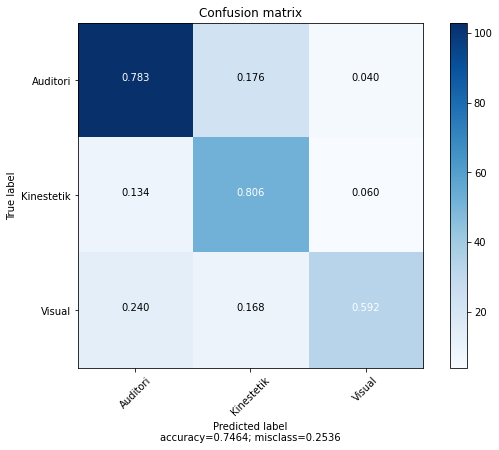

In [ ]:
import pandas as pd

df2 = pd.read_excel('datauji.xlsx')
df2
i = df2.drop('Hasil', axis=1)
j = df2['Hasil']
le = LabelEncoder()
label2 = le.fit_transform(j)
# j = label2

j_pred = model_KNN.predict(i)
print(accuracy_score(j, j_pred))

cm = confusion_matrix(j, j_pred)
plot_confusion_matrix(cm)

In [ ]:
accuracy_score(y_test, y_pred)

0.8857142857142857

In [ ]:
hasil = pd.DataFrame({'Accuracy Uniform': acc_score_uni[0], 'Average of cross validation score Uniform': cv_score_uni[0]})


In [ ]:
hasil

,Accuracy Uniform,Average of cross validation score Uniform
0,0.828571,0.696032
1,0.828571,0.688095
2,0.857143,0.746825
3,0.771429,0.753704
4,0.800000,0.760847
5,0.800000,0.746296
6,0.742857,0.753439
7,0.800000,0.761111
8,0.800000,0.746561
9,0.600000,0.629894


In [ ]:
import pandas as pd

hasil = pd.DataFrame({'Accuracy Uniform': acc_score_uni[0], 'Average of cross validation score Uniform': cv_score_uni[0],'Accuracy Distance': acc_score_dist[0], 'Average of cross validation score Distance': cv_score_dist[0]})

## save to xlsx file

filepath = 'my_excel_file.xlsx'

hasil.to_excel(filepath, index=False)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names=['Auditori','Kinestetik','Visual'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    if normalize:
      plt.imshow(cm/7, interpolation='nearest', cmap=cmap)
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

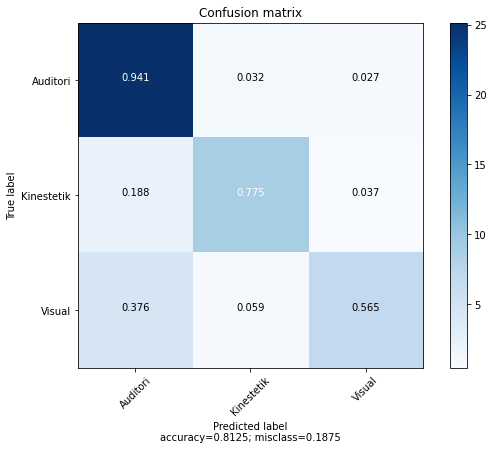

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print(FP)
print(FN)
print(TP)
print(TN)

[47 11  8]
[11 18 37]
[176  62  48]
[118 261 259]


In [ ]:
np.diag(cm) 

array([176,  62,  48])

In [ ]:
cm.sum(axis=0)

array([223,  73,  56])